# 对movie数据进行分析


movie描述信息在u.item文件中为
movie_id，
title, 
release_date, 
video_release_date，
imdb_url

格式如下：
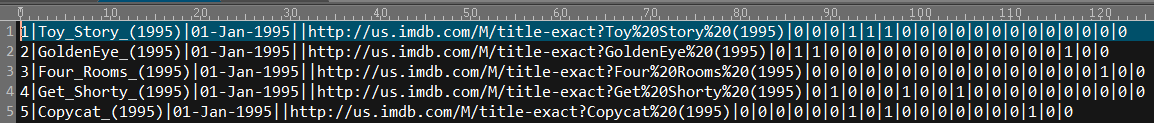

# 导入工具包

In [1]:
import pandas as pd
import numpy as np

import scipy.sparse as ss
import scipy.io as sio

#保存数据
import cPickle

#event的特征需要编码
from utils import FeatureEng

from sklearn.preprocessing import normalize
#相似度/距离
import scipy.spatial.distance as ssd

In [2]:
#读取数据
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 

df_movies = pd.read_csv('u.item', sep='|', names=m_cols,encoding='latin-1') 
df_movies.head()

movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's   ...     Fantasy  Film-Noir  Horror  \
0          0          1           1   ...           0          0       0   
1          1          0           0   ...           0          0       0   
2          0          0           0   ...           0          0       0   
3          0          0           0   ...           0          0       0   
4          0          0           0   ...           0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         1    0        0  
2        0        0        0       0         1    0        0  
3        0        0        0       0         0    0        0  
4        0        0        0       0         1    0        0  

[5 rows x 24 columns]

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [4]:
#日期特征编码
df_movies['Date'] = pd.to_datetime(df_movies['release_date'])

#video_release_date全是缺失值，果断丢弃
#imdb_url 特征解析比较麻烦，和打分可能关系也不大，丢弃
df_movies.drop(['release_date','video_release_date','imdb_url'], axis=1, inplace=True)

In [5]:
df_movies.tail()

movie_id                                      title  unknown  Action  \
1677      1678                          Mat' i syn (1997)        0       0   
1678      1679                           B. Monkey (1998)        0       0   
1679      1680                       Sliding Doors (1998)        0       0   
1680      1681                        You So Crazy (1994)        0       0   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)        0       0   

      Adventure  Animation  Children's  Comedy  Crime  Documentary    ...      \
1677          0          0           0       0      0            0    ...       
1678          0          0           0       0      0            0    ...       
1679          0          0           0       0      0            0    ...       
1680          0          0           0       1      0            0    ...       
1681          0          0           0       0      0            0    ...       

      Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
1677          0       0        0        0        0       0         0    0   
1678          0       0        0        0        1       0         1    0   
1679          0       0        0        0        1       0         0    0   
1680          0       0        0        0        0       0         0    0   
1681          0       0        0        0        0       0         0    0   

      Western       Date  
1677        0 1998-02-06  
1678        0 1998-02-06  
1679        0 1998-01-01  
1680        0 1994-01-01  
1681        0 1996-03-08  

[5 rows x 22 columns]

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 22 columns):
movie_id       1682 non-null int64
title          1682 non-null object
unknown        1682 non-null int64
Action         1682 non-null int64
Adventure      1682 non-null int64
Animation      1682 non-null int64
Children's     1682 non-null int64
Comedy         1682 non-null int64
Crime          1682 non-null int64
Documentary    1682 non-null int64
Drama          1682 non-null int64
Fantasy        1682 non-null int64
Film-Noir      1682 non-null int64
Horror         1682 non-null int64
Musical        1682 non-null int64
Mystery        1682 non-null int64
Romance        1682 non-null int64
Sci-Fi         1682 non-null int64
Thriller       1682 non-null int64
War            1682 non-null int64
Western        1682 non-null int64
Date           1681 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(20), object(1)
memory usage: 289.2+ KB


注意：date的空值NaT并不能被识别为non-null

# 特征编码、movie之间的相似度

In [7]:
FE = FeatureEng()

n_Movies = df_movies.shape[0]  

#movie_id， title, release_date, video_release_date， imdb_url
#只保留 release_date
moviePropMatrix = ss.dok_matrix((n_Movies, 1))
movieGenreMatrix = ss.dok_matrix((n_Movies, 19))

for i in range(df_movies.shape[0]): 
    movieId = df_movies.loc[i,'movie_id']-1  #索引从0开始
    
    #日期特征 --> 已经发布的天数（距离1995-01-01）
    days = FE.getDate(df_movies.loc[i,'Date'])
    moviePropMatrix[movieId, 0] = days
        
    #genre特征,已经是0/1编码了，copy过来即可
    for j in range(2, 21):
        movieGenreMatrix[movieId, j-5] = df_movies.iloc[i,j]

#用L2模归一化，发布天数，不归一了
#moviePropMatrix = normalize(moviePropMatrix,norm="l2", copy=False)
sio.mmwrite("moviePropMatrix", moviePropMatrix)

# calculate similarity between event pairs based on the two matrices
moviePropSim = ss.dok_matrix((n_Movies, n_Movies))
movieGenreSim = ss.dok_matrix((n_Movies, n_Movies))

#读取在测试集和训练集中出现的事件对
#存储是电影的编号，从0开始
uniqueMoviePairs = cPickle.load(open("uniqueMoviePairs.pkl", 'rb'))

for e1, e2 in uniqueMoviePairs:
    i = e1  #int(e1)-1
    j = e2  #int(e2)-1
    
    #采用负欧式距离作为相似度
    if not moviePropSim.has_key((i,j)):
        epsim = -ssd.euclidean(moviePropMatrix.getrow(i).todense(),
            moviePropMatrix.getrow(j).todense())
        
        #epsim = 1/ssd.euclidean(moviePropMatrix[i,:],moviePropMatrix[j,:])
        
        moviePropSim[i, j] = epsim
        moviePropSim[j, i] = epsim
                                             
    #采用负hamming距离作为相似度                                         
    if not movieGenreSim.has_key((i,j)):
        #epsim = 1/ssd.hamming(movieGenreMatrix[i,:],movieGenreMatrix[j,:])
        epsim = -ssd.hamming(movieGenreMatrix.getrow(i).todense(),
            movieGenreMatrix.getrow(j).todense())

       
        movieGenreSim[i, j] = epsim
        movieGenreSim[j, i] = epsim
    
sio.mmwrite("moviePropSim", moviePropSim)
sio.mmwrite("movieGenreSim", movieGenreSim)

In [ ]:
moviePropMatrix.getrow(0).todense()